<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/PhyloAnova_(bio_variables_vs_WA)__87t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Add this at the top of your notebook
%load_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
install.packages("phytools")
install.packages("caper")
install.packages("geiger")
install.packages("ape")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘ape’, ‘maps’, ‘clusterGeneration’, ‘coda’, ‘combinat’, ‘DEoptim’, ‘doParallel’, ‘expm’, ‘foreach’, ‘mnormt’, ‘numDeriv’, ‘optimParallel’, ‘phangorn’, ‘scatterplot3d’

trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fastmatch_1.1-6.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/igraph_2.1.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/quadprog_1.5-8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ape_5.8-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/maps_3.4.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/clusterGeneration_1.3.8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/coda_0.19-4.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/combinat_0.0-8.tar.gz'
trying URL 'https://c

In [ ]:
%%R
library(phytools)
library(caper)
library(geiger)
library(ape)
library(readxl)


In [ ]:

%%R
tree <-read.tree("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.87t.WAonly.tree")

dd <- read.csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/processed_species_87t.csv")

summary_data <- read_excel("/content/drive/MyDrive/PLANT RESEARCH/datasets/2025-01-20-Exported Summary Data_all species.201t.FN.xlsx")

dd$species


New names:
• `` -> `...1`
 [1] "Blackallia_nudiflora"       "Cryptandra_apetala"        
 [3] "Cryptandra_arbutiflora"     "Cryptandra_aridicola"      
 [5] "Cryptandra_beverleyensis"   "Cryptandra_congesta"       
 [7] "Cryptandra_connata"         "Cryptandra_crispula"       
 [9] "Cryptandra_dielsii"         "Cryptandra_distigma"       
[11] "Cryptandra_exserta"         "Cryptandra_glabriflora"    
[13] "Cryptandra_imbricata"       "Cryptandra_inconspicua"    
[15] "Cryptandra_intonsa"         "Cryptandra_intratropica"   
[17] "Cryptandra_leucopogon"      "Cryptandra_micrantha"      
[19] "Cryptandra_minutifolia"     "Cryptandra_monticola"      
[21] "Cryptandra_multispina"      "Cryptandra_mutila"         
[23] "Cryptandra_myriantha"       "Cryptandra_nola"           
[25] "Cryptandra_nutans"          "Cryptandra_pendula"        
[27] "Cryptandra_pungens"         "Cryptandra_recurva"        
[29] "Cryptandra_scoparia"        "Cryptandra_spyridioides"   
[31] "Cryptandra_stellulata" 

In [ ]:
%%R
colnames(dd)

 [1] "species"       "WA"            "Age"           "Ploidy"       
 [5] "log.length"    "log.area"      "log.turn"      "log.netd"     
 [9] "log.spec"      "species.1"     "Rare..Yes.No." "EPBC"         
[13] "WA.Ranking"    "January"       "February"      "March"        
[17] "April"         "May"           "June"          "July"         
[21] "August"        "September"     "October"       "November"     
[25] "December"      "log.b19"       "log.b18"       "log.b17"      
[29] "log.b16"       "log.b15"       "log.b14"       "log.b13"      
[33] "log.b12"       "log.b11"       "log.b10"       "log.b9"       
[37] "log.b8"        "log.b7"        "log.b6"        "log.b5"       
[41] "log.b4"        "log.b3"        "log.b2"        "log.b1"       


In [ ]:
%%R
colnames(summary_data)

 [1] "...1"                   "order"                  "Species.1.1"           
 [4] "SORT ORDER"             "species"                "Rare (Yes/No)"         
 [7] "EPBC"                   "EPBC comment Francis"   "WA (Priority)"         
[10] "AGE (Ma)"               "genus"                  "ploidy"                
[13] "ploidy.CAT"             "Length (km)"            "Area (km2)"            
[16] "length (km)"            "area (km2) ellipsodial" "turnover"              
[19] "net.div"                "speciation"             "extinct.frac"          
[22] "extinction"             "log.length"             "log.area"              
[25] "log.turn"               "log.netd"               "log.spec"              
[28] "bio15"                  "bio12"                  "bio7"                  
[31] "bio4"                   "log.b15"                "log.b12"               
[34] "log.b7"                 "log.b4"                 "RANGE to the right"    
[37] "bio15.1"                "bio12.1" 

In [ ]:
%%R
# Select relevant columns from summary_data
selected_columns <- c("species", "extinction", "net.div")

# Subset summary_data to include only those columns
summary_subset <- summary_data[, selected_columns]

# Merge into dd by 'species'
dd <- merge(dd, summary_subset, by = "species", all.x = TRUE)


In [ ]:
%%R
# which are mismatched?
tree_not_dd <- tree$tip.label[which(!tree$tip.label %in% dd$species)]
dd_not_tree <- dd$species[which(!dd$species %in% tree$tip.label)]

# drop mismatched
dd <- dd[which(!dd$species %in% dd_not_tree ),]
tree <- drop.tip(tree, tree_not_dd)


In [ ]:
%%R
# double check they match
all(dd$species %in% tree$tip.label)
all(tree$tip.label %in% dd$species)


[1] TRUE


[1] 87


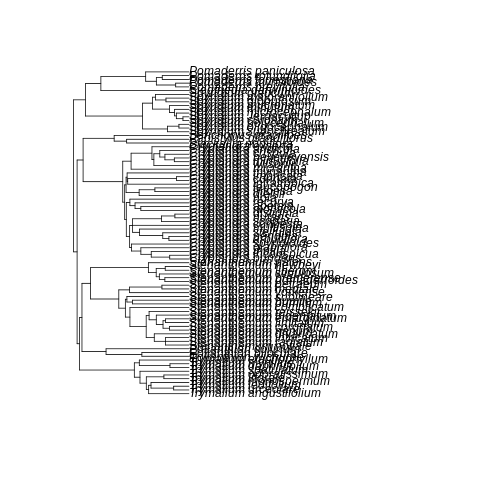

In [ ]:
%%R
plot(tree)
Ntip(tree)


In [ ]:
%%R
colnames(dd)

 [1] "species"       "WA"            "Age"           "Ploidy"       
 [5] "log.length"    "log.area"      "log.turn"      "log.netd"     
 [9] "log.spec"      "species.1"     "Rare..Yes.No." "EPBC"         
[13] "WA.Ranking"    "January"       "February"      "March"        
[17] "April"         "May"           "June"          "July"         
[21] "August"        "September"     "October"       "November"     
[25] "December"      "log.b19"       "log.b18"       "log.b17"      
[29] "log.b16"       "log.b15"       "log.b14"       "log.b13"      
[33] "log.b12"       "log.b11"       "log.b10"       "log.b9"       
[37] "log.b8"        "log.b7"        "log.b6"        "log.b5"       
[41] "log.b4"        "log.b3"        "log.b2"        "log.b1"       


In [ ]:
%%R
dd$WA.Ranking

 [1] 3 0 0 0 3 4 0 3 3 0 1 2 0 2 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 3 0 2 4 3 0 0 0
[39] 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 2 4 0 0 3 0 0 0 1 2 1 0 3 0 1 0 0 0 2 0 0 2 0
[77] 1 0 0 0 0 1 2 0 0 0 0


In [ ]:
%%R
dd <- dd[match(tree$tip.label, dd$species), ]

In [ ]:
%%R

significance_table <- data.frame(variable = character(), p_value = numeric(), significance = character())

# Loop through log.b1 to log.b19
for (i in 1:19) {
  # Construct the column name
  y_col_name <- paste("log.b", i, sep = "")
  # Assign y and x
  y <- dd[[y_col_name]]
  x <- dd$WA.Ranking

  # Perform phylANOVA
  result <- phylANOVA(tree, x, y, nsim=1000, posthoc=TRUE, p.adj="holm")

  p <- result$Pf

  if (!is.null(p)) {
    sig <- ifelse(p < 0.05, "significant", "not significant")
    significance_table <- rbind(significance_table, data.frame(variable = y_col_name, p_value = p, significance = sig))
  }

   # Print the results for each column
  cat("Results for", y_col_name, ":\n")
  print(result)
  cat("\n") # Add a newline for better readability

}

print(significance_table)




Results for log.b1 :
ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq  Mean Sq  F value Pr(>F)
x        0.037140 0.009285 4.686131  0.004
Residual 0.162474 0.001981                

P-value based on simulation.
---------

Pairwise posthoc test using method = "holm"

Pairwise t-values:
          0         1         2         3        4
0  0.000000 -1.859913 -1.159960 -3.526250 1.560365
1  1.859913  0.000000  0.592632 -0.859281 2.417272
2  1.159960 -0.592632  0.000000 -1.554196 2.010862
3  3.526250  0.859281  1.554196  0.000000 3.198846
4 -1.560365 -2.417272 -2.010862 -3.198846 0.000000

Pairwise corrected P-values:
      0     1     2     3     4
0 1.000 0.546 0.648 0.027 0.625
1 0.546 1.000 0.786 0.786 0.048
2 0.648 0.786 1.000 0.625 0.301
3 0.027 0.786 0.625 1.000 0.010
4 0.625 0.048 0.301 0.010 1.000
---------




Results for log.b2 :
ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq  Mean Sq  F value Pr(>F)
x        0.043029 0.010757 5.465815  0.001
Resi

In [ ]:
%%R

library(phytools)

# Define the list of variables you want to test
phylo_vars <- c("Age", "net.div", "log.netd", "log.turn", "log.spec",
                "extinction", "Ploidy" , "log.area", "log.length"
                 )

significance_table <- data.frame(variable = character(),
                                 p_value = numeric(),
                                 F_value = numeric(),
                                 significance = character())

# Loop through each variable
for (var in phylo_vars) {
  y <- dd[[var]]
  x <- dd$WA.Ranking

  # Run phylANOVA
  result <- phylANOVA(tree, x, y, nsim=1000, posthoc=TRUE, p.adj="holm")

  p <- result$Pf
  Fval <- result$F

  if (!is.null(p)) {
    sig <- ifelse(p < 0.05, "significant", "not significant")
    significance_table <- rbind(significance_table,
                                data.frame(variable = var,
                                           p_value = p,
                                           F_value = Fval,
                                           significance = sig))
  }

  cat("Results for", var, ":\n")
  print(result)
  cat("\n")
}

print(significance_table)




Results for Age :
ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq  Mean Sq  F value Pr(>F)
x          82.968 20.74200 1.581848  0.175
Residual 1075.226 13.11251                

P-value based on simulation.
---------

Pairwise posthoc test using method = "holm"

Pairwise t-values:
         0         1         2         3         4
0 0.000000 -0.650539 -1.448542 -1.866584 -1.398423
1 0.650539  0.000000 -0.552644 -0.731247 -0.822677
2 1.448542  0.552644  0.000000 -0.145339 -0.416070
3 1.866584  0.731247  0.145339  0.000000 -0.328781
4 1.398423  0.822677  0.416070  0.328781  0.000000

Pairwise corrected P-values:
      0 1     2    3 4
0 1.000 1 0.864 0.75 1
1 1.000 1 1.000 1.00 1
2 0.864 1 1.000 1.00 1
3 0.750 1 1.000 1.00 1
4 1.000 1 1.000 1.00 1
---------




Results for net.div :
ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq  Mean Sq  F value Pr(>F)
x        0.001845 0.000461 0.909925  0.471
Residual 0.041559 0.000507                

P-value based on